<a href="https://colab.research.google.com/github/mateusopaiva/modelos-classificacao-regressao/blob/main/treinando_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.style.use("seaborn-darkgrid")

<ipython-input-1-4958be1cc674>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


### O treinamento de um modelo de regressão linear

In [2]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

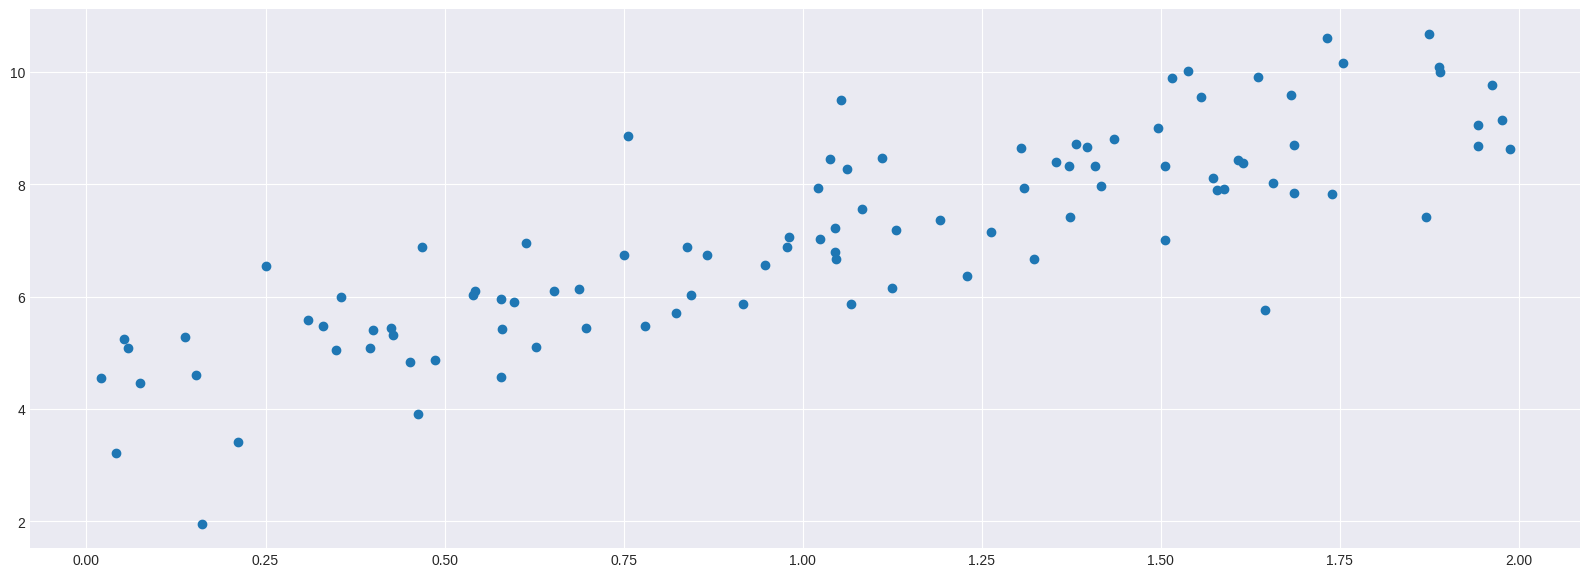

In [3]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

In [4]:
x_b = np.c_[np.ones((100, 1)), x]
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [5]:
theta

array([[4.25479432],
       [2.71343883]])

In [6]:
y_hat = theta[0] + x * theta[1]

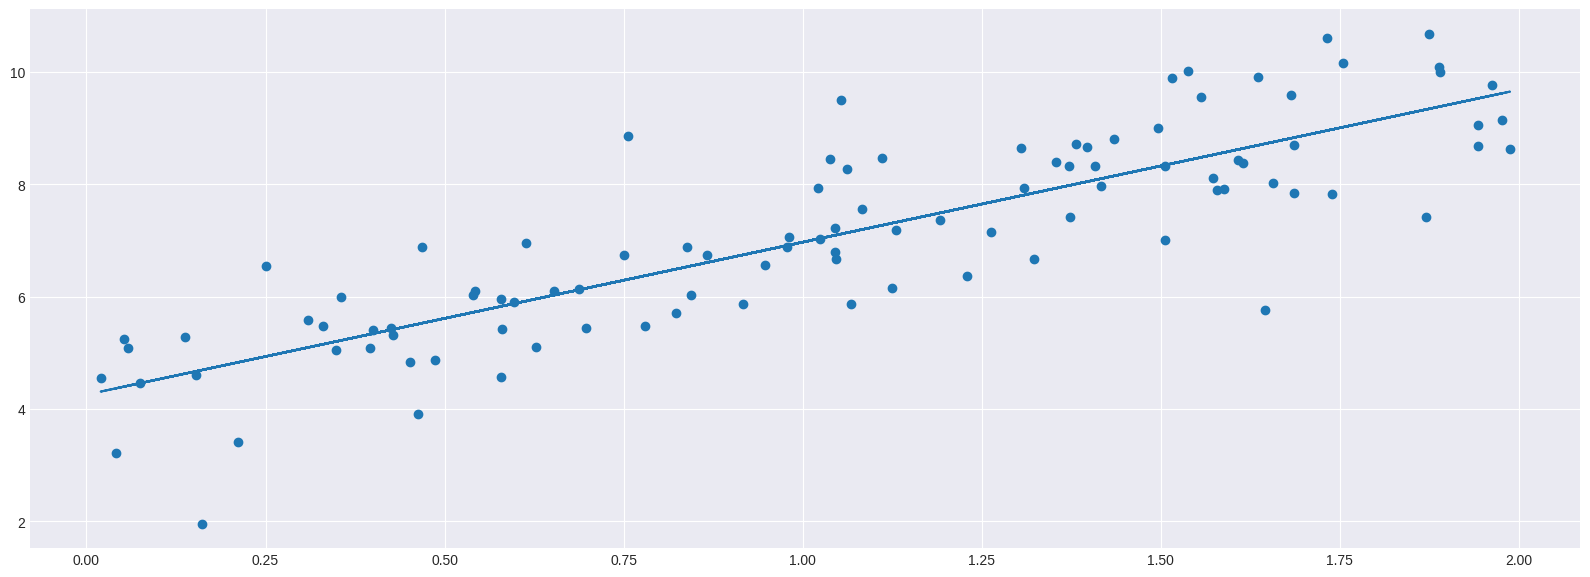

In [7]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.plot(x, y_hat)
plt.scatter(x, y)

### Regressão linear no sklearn

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.25479432]), array([[2.71343883]]))

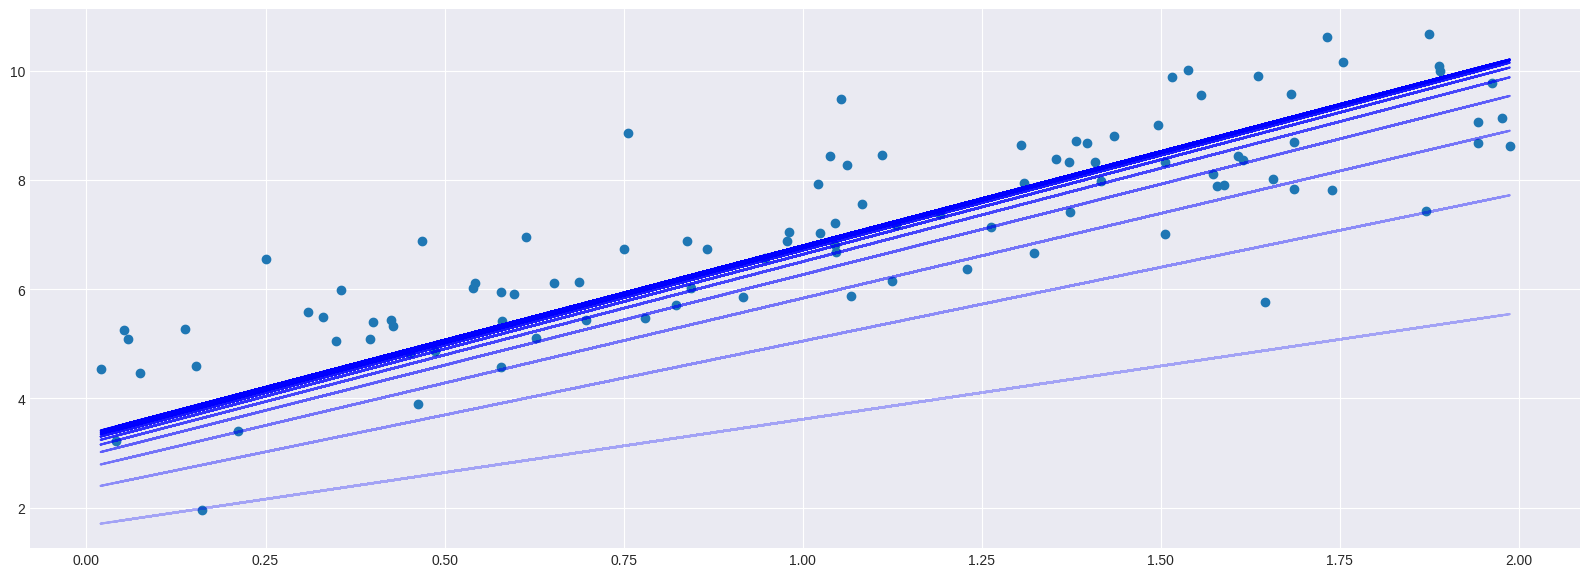

In [9]:
eta = 0.1  # learning rate
n_iterations = 10
m = 100

theta = np.random.randn(2,1)  # random initialization
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        alpha = min(0.3 + iteration / n_iterations, 1)
        ax.plot(x, y_hat, alpha=alpha, color="blue")

## Batch Gradient Descent

In [10]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

Text(0.5, 1.0, 'Eta: 0.1')

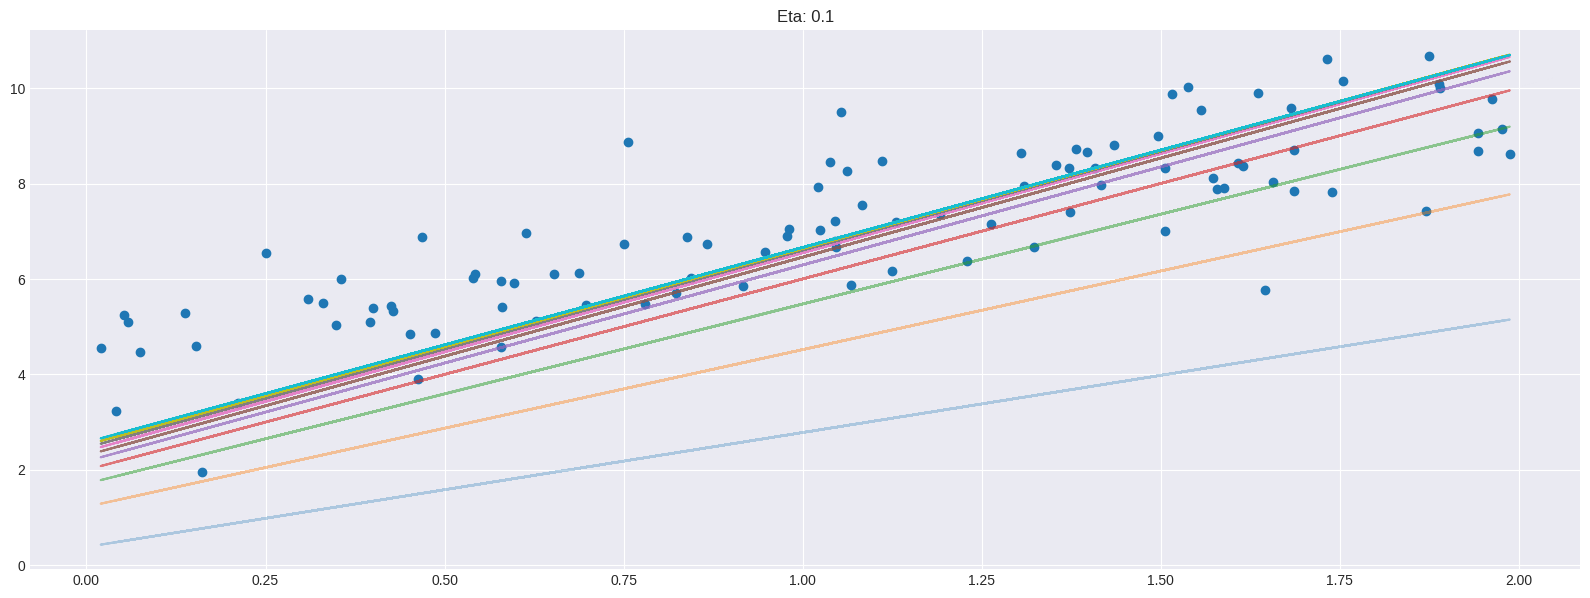

In [11]:
eta = 0.1  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2,1)  # random initialization

fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients


    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=min(1, 0.3 + iteration / n_iterations))

ax.set_title("Eta: {}".format(eta))

Text(0.5, 1.0, 'Eta: 0.01')

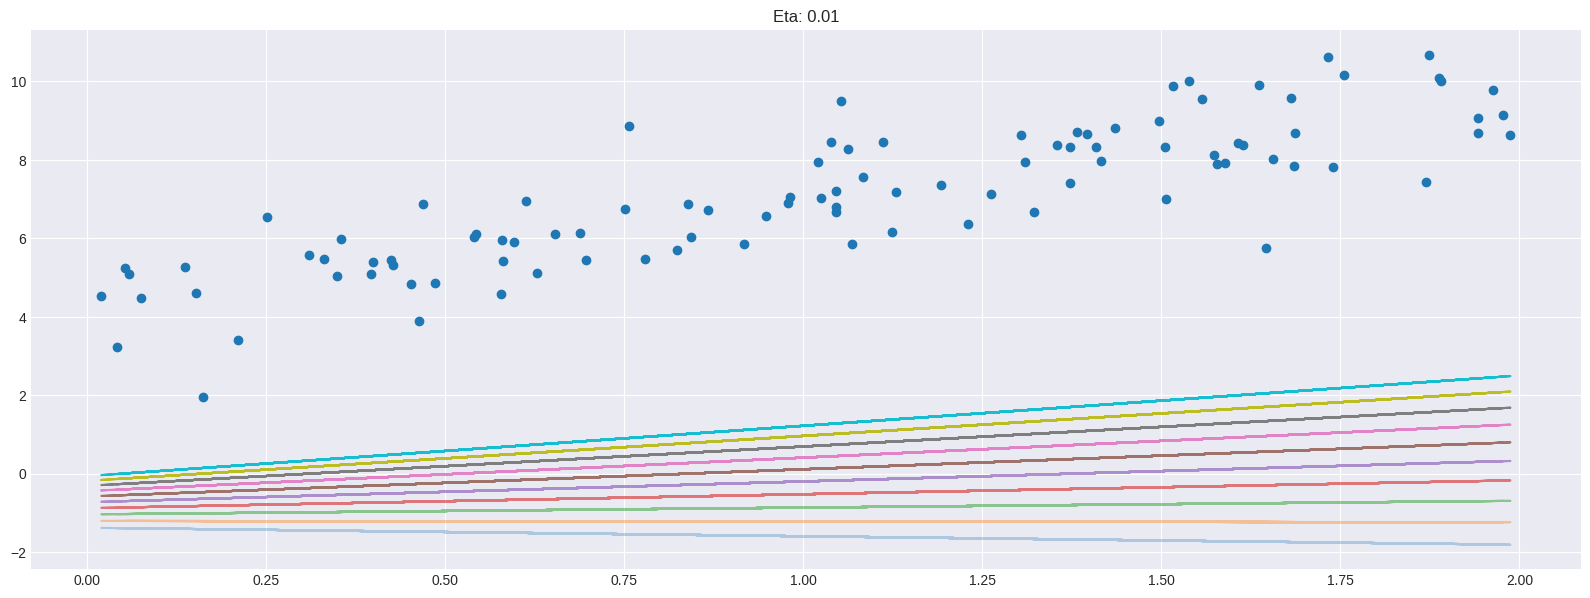

In [12]:
eta = 0.01  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2,1)  # random initialization

fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients


    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=min(1, 0.3 + iteration / n_iterations))
ax.set_title("Eta: {}".format(eta))

Text(0.5, 1.0, 'Eta: 0.5')

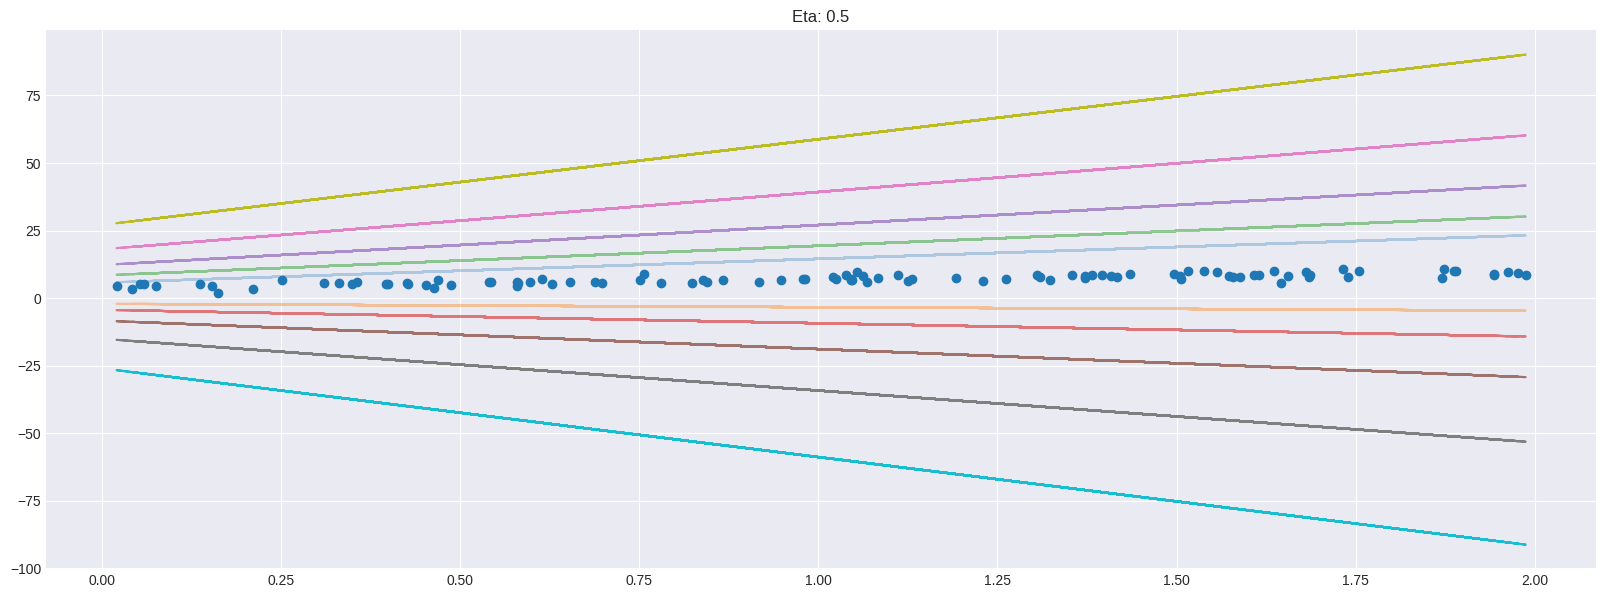

In [13]:
eta = 0.5  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2,1)  # random initialization

fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients


    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=min(1, 0.3 + iteration / n_iterations))
ax.set_title("Eta: {}".format(eta))

### Regressão polinomial

In [14]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

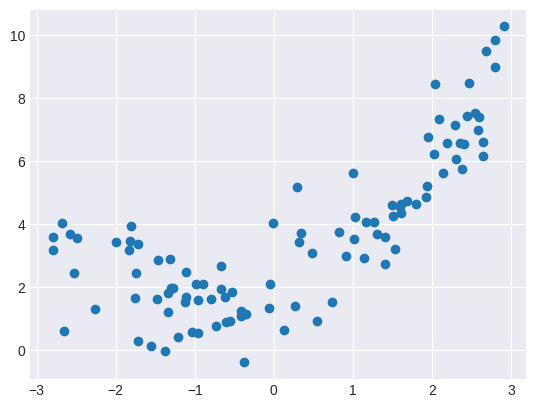

In [15]:
plt.scatter(x, y)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

In [17]:
x_poly[0]

array([-1.55060533,  2.4043769 ])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9456293]), array([[0.90187049, 0.52163259]]))

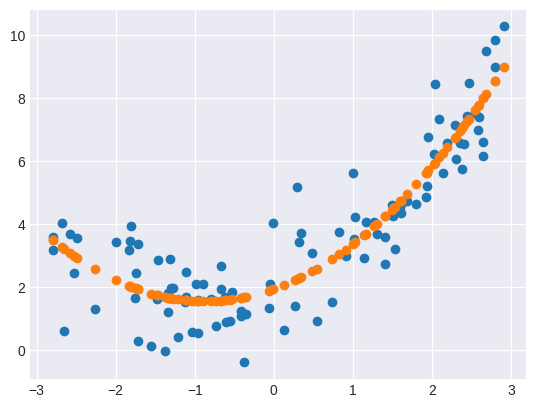

In [19]:
plt.scatter(x, y)
plt.scatter(x, lin_reg.predict(x_poly))

### O que acontece se a complexidade do modelo for aumentada desnecessariamente?

(-4.0, 4.0)

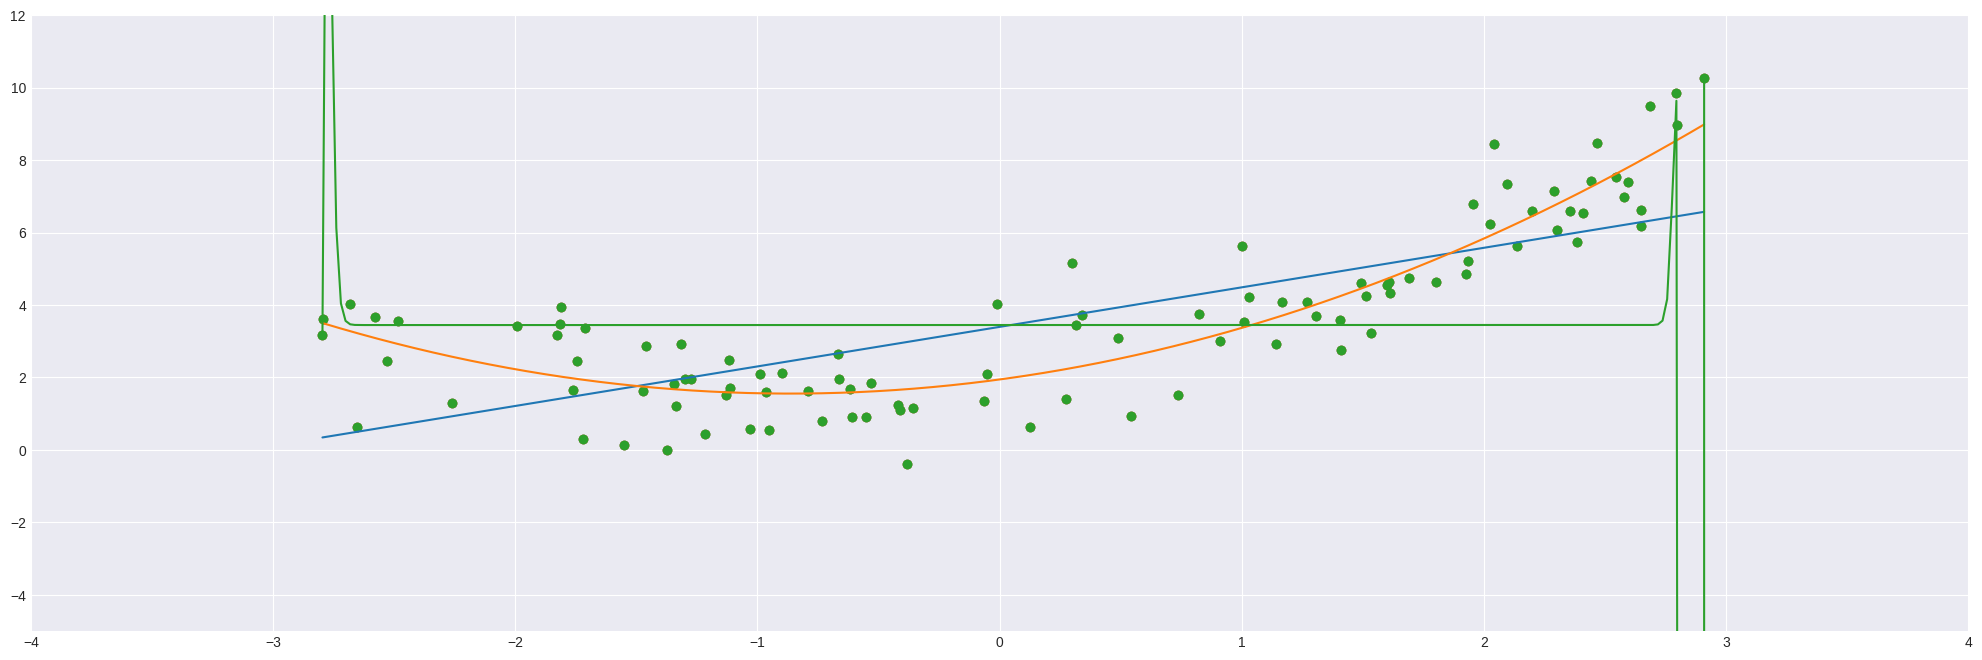

In [20]:
fig, ax = plt.subplots(figsize=(25, 8))
for degree in [1, 2, 300]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)

    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)

    plt.scatter(x, y)
    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, lin_reg.predict(x_seq_transf), label=degree)
ax.set_ylim([-5, 12])
ax.set_xlim([-4, 4])

### Ridge Regression

In [21]:
m = 100
x = np.random.rand(m, 1) - 3
y = np.random.randn(m, 1)

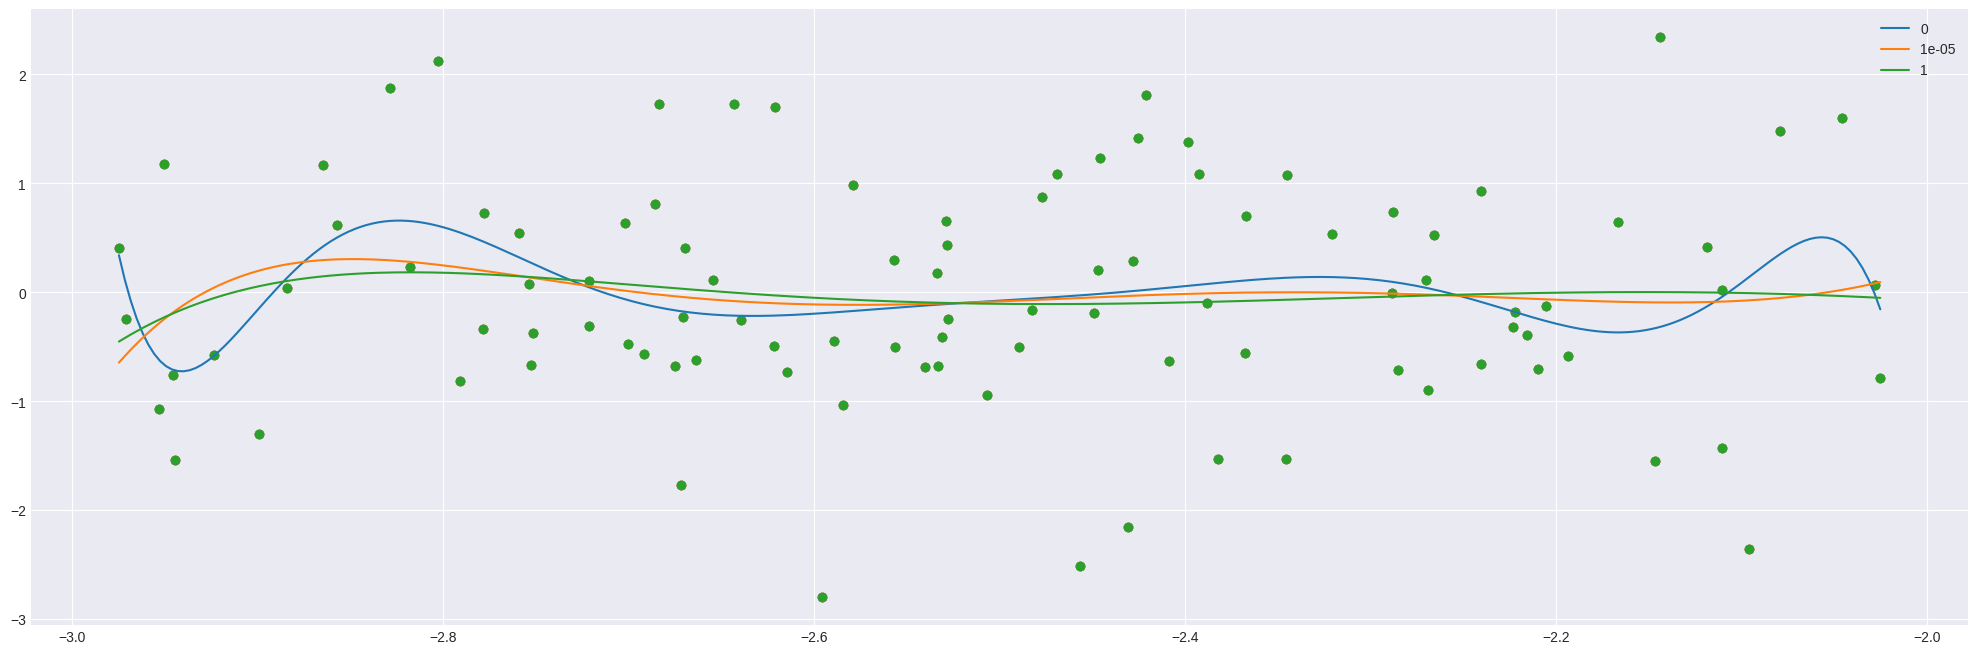

In [22]:
from sklearn.linear_model import Ridge

fig, ax = plt.subplots(figsize=(25, 8))
for alpha in [0, 1e-5, 1]:
    poly_features = PolynomialFeatures(degree=10, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)

    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_reg.fit(x_poly, y)

    plt.scatter(x, y)
    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, ridge_reg.predict(x_seq_transf), label=alpha)
ax.legend()

### Regressão Logística

In [23]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [24]:
x = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

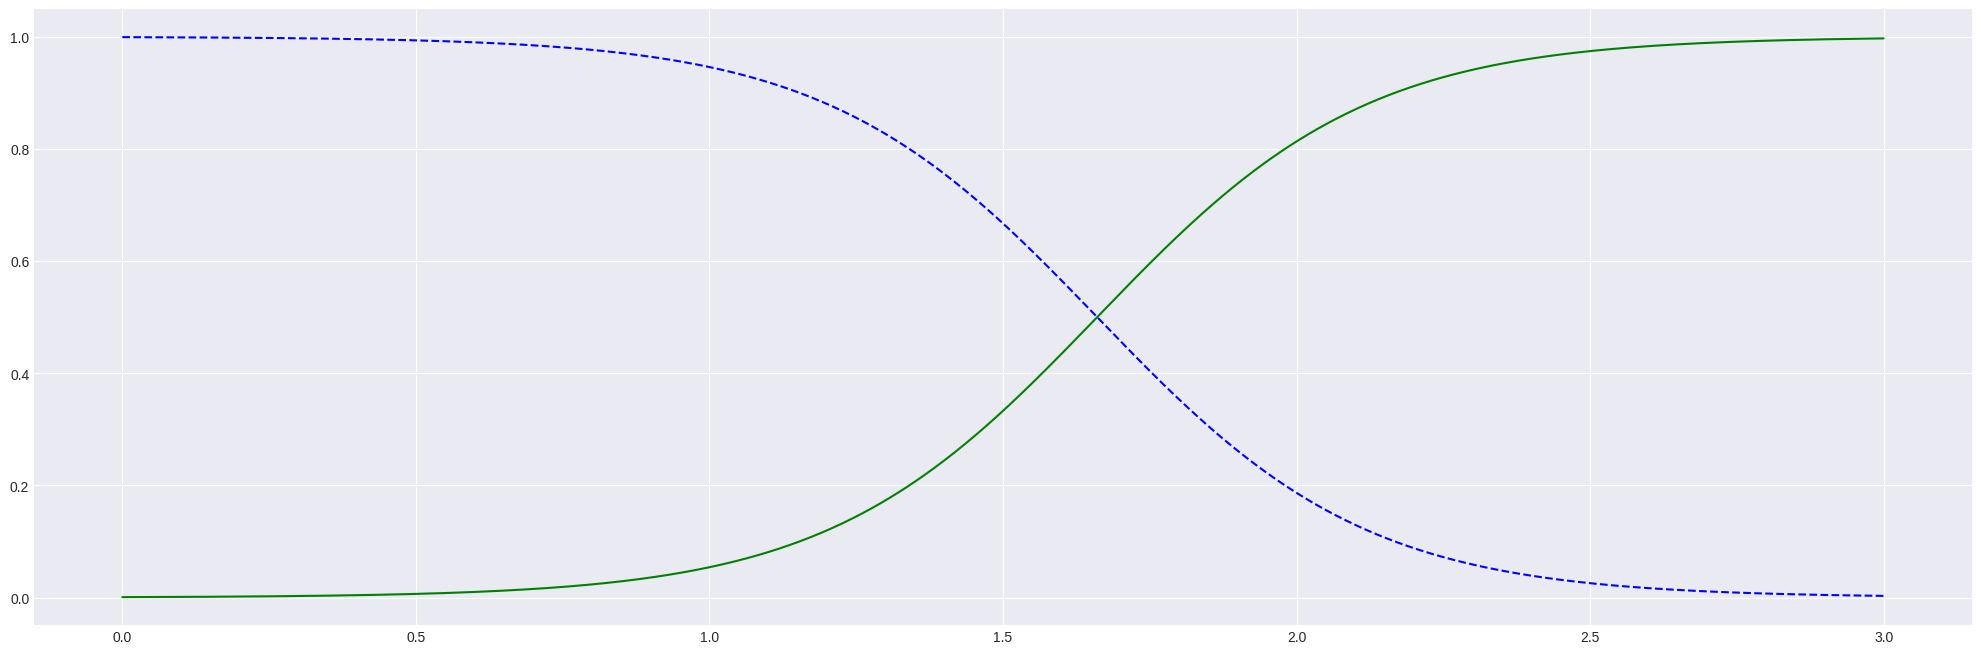

In [26]:
fig, ax = plt.subplots(figsize=(25, 8))

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

### Softmax Regression

In [27]:
x = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(x, y)

LogisticRegression(C=10, multi_class='multinomial')

In [28]:
0.5 * np.log(1/0.5) + 0.5 * np.log(1/0.5)

0.6931471805599453

In [29]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

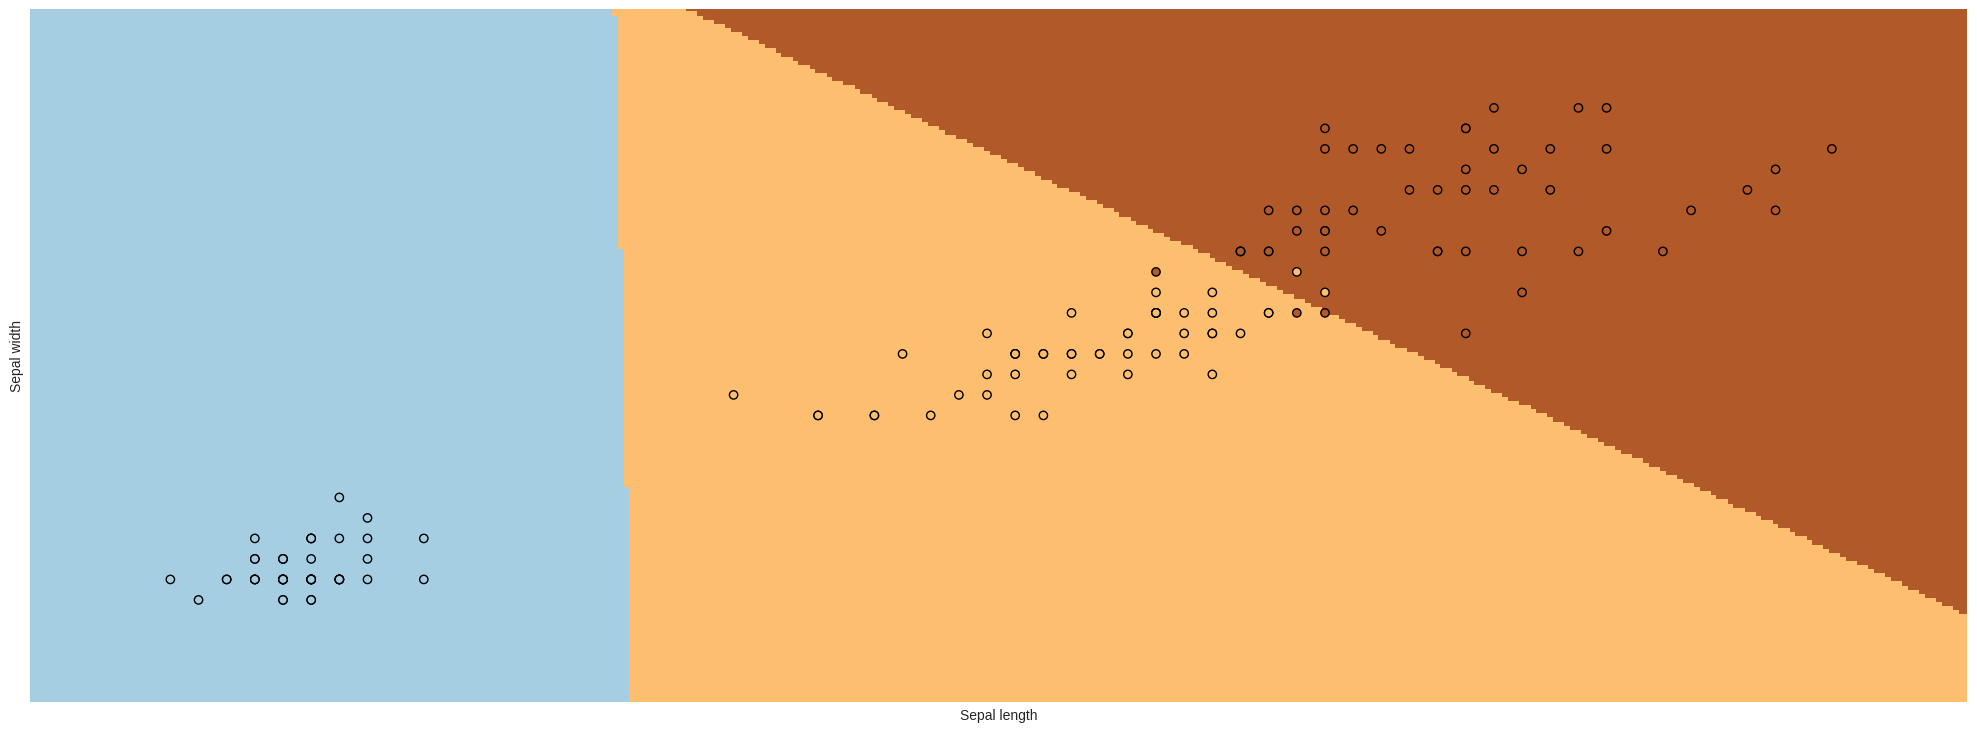

In [31]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(25, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()